In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.animation

In [10]:
width = 100
height = 100
initProb = 0.6

In [3]:
def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = 1
            else:
                state = 0
            config[y, x] = state

    nextConfig = zeros([height, width])

def observe():
    fig,ax=plt.subplots()
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    plt.axis('image')
    plt.title('t = ' + str(time))
    plt.show()
    

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            numberOfAlive = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    numberOfAlive += config[(y+dy)%height, (x+dx)%width]
            if state == 0 and numberOfAlive == 3:
                state = 1
            elif state == 1 and (numberOfAlive < 3 or numberOfAlive > 4):
                state = 0
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

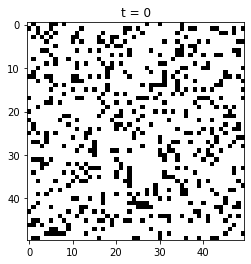

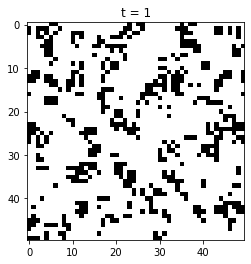

In [5]:
initialize()
observe()
update()
observe()

<IPython.core.display.Javascript object>


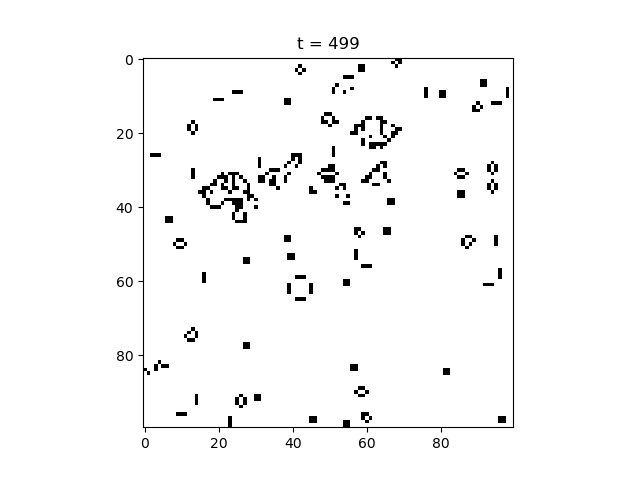

In [11]:
%matplotlib notebook
initialize()
ims=[]
fig,ax=plt.subplots()
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

In [12]:
width = 100
height = 100
initProb = 0.1
maxState = 6


In [15]:
def initialize():
    global time, config, nextConfig
    
    time = 0

    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = maxState
            else:
                state = 0
            config[y, x] = state

    nextConfig = zeros([height, width])

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                num = 0
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == maxState:
                            num += 1
                if random.random() * 3 < num:
                    state = maxState
                else:
                    state = 0
            else:
                state -= 1
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


<IPython.core.display.Javascript object>


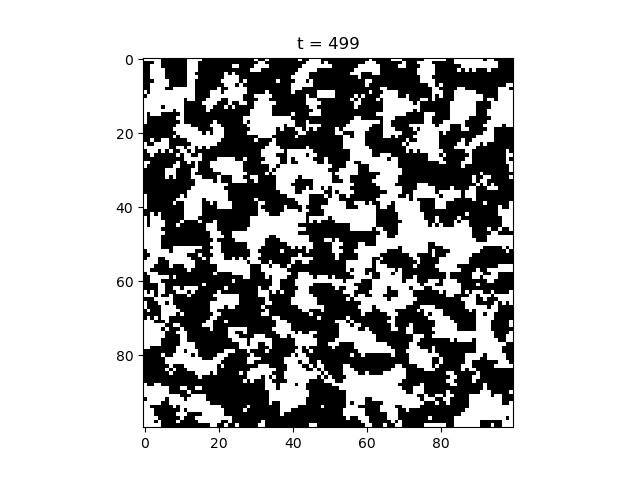

In [16]:
initialize()
ims=[]
fig,ax=plt.subplots()
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 1, cmap = 'binary',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

In [21]:
width = 50
height = 50
numberOfStates = 3
r = 2

def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            config[y, x] = random.randint(numberOfStates)

    nextConfig = zeros([height, width])

def observe():
    cla()
    imshow(config, vmin = 0, vmax = numberOfStates - 1, cmap = cm.winter)
    axis('image')
    title('t = ' + str(time))

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            counts = [0] * numberOfStates
            for dx in range(- r, r + 1):
                for dy in range(- r, r + 1):
                    s = int(config[(y+dy)%height, (x+dx)%width])
                    counts[s] += 1
            maxCount = max(counts)
            maxStates = []
            for i in range(numberOfStates):
                if counts[i] == maxCount:
                    maxStates.append(i)
            state = random.choice(maxStates)
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


<IPython.core.display.Javascript object>


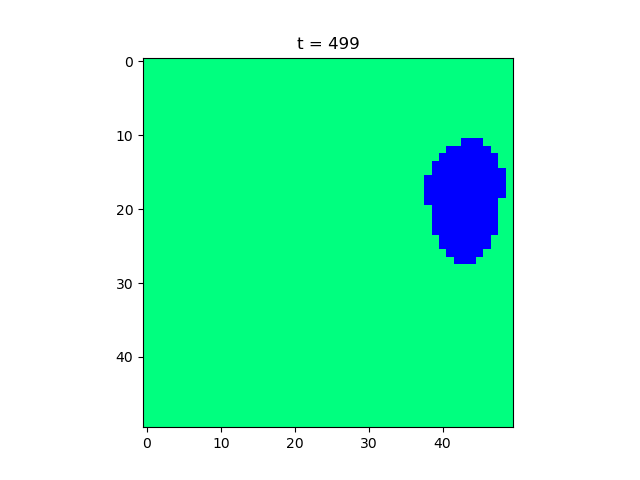

In [22]:
initialize()
ims=[]
fig,ax=plt.subplots()
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 1, cmap = 'winter',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 1, cmap = 'winter',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

In [4]:
%matplotlib notebook

width = 50
height = 50
initProb = 0.01
infectionRate = 0.85
regrowthRate = 0.15

def initialize():
    global time, config, nextConfig

    time = 0
    
    config = zeros([height, width])
    for x in range(width):
        for y in range(height):
            if random.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = zeros([height, width])

def observe():
    cla()
    imshow(config, vmin = 0, vmax = 2, cmap = cm.jet)
    axis('image')
    title('t = ' + str(time))

def update():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if random.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if random.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config


<IPython.core.display.Javascript object>


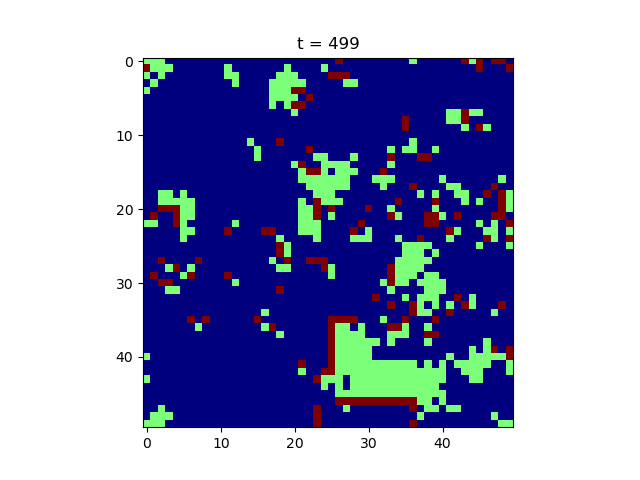

In [5]:
initialize()
ims=[]
fig,ax=plt.subplots()
for i in range(500):
    im=ax.imshow(config, vmin = 0, vmax = 2, cmap = 'jet',animated=True)
    plt.title('t = ' + str(i))
    if i==0:
        ax.imshow(config, vmin = 0, vmax = 2, cmap = 'jet',animated=True)
    ims.append([im])
    update()

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)